In [473]:
print('Hello World!')

Hello World!


In [474]:
# imports
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

In [475]:
# Connect
db = sqlite3.connect("exercise01.sqlite")
cursor = db.cursor()

In [493]:
def printTableInfo():
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    for table_name in tables:
        table_name = table_name[0]
        print(table_name)
        cursor.execute("PRAGMA table_info({})".format(table_name))
        if table_name != 'records':
            cursor.execute("SELECT * from {}".format(table_name))
        print(cursor.fetchall())
printTableInfo()


workclasses
[(1, '?'), (2, 'Federal-gov'), (3, 'Local-gov'), (4, 'Never-worked'), (5, 'Private'), (6, 'Self-emp-inc'), (7, 'Self-emp-not-inc'), (8, 'State-gov'), (9, 'Without-pay')]
education_levels
[(1, '10th'), (2, '11th'), (3, '12th'), (4, '1st-4th'), (5, '5th-6th'), (6, '7th-8th'), (7, '9th'), (8, 'Assoc-acdm'), (9, 'Assoc-voc'), (10, 'Bachelors'), (11, 'Doctorate'), (12, 'HS-grad'), (13, 'Masters'), (14, 'Preschool'), (15, 'Prof-school'), (16, 'Some-college')]
marital_statuses
[(1, 'Divorced'), (2, 'Married-AF-spouse'), (3, 'Married-civ-spouse'), (4, 'Married-spouse-absent'), (5, 'Never-married'), (6, 'Separated'), (7, 'Widowed')]
occupations
[(1, '?'), (2, 'Adm-clerical'), (3, 'Armed-Forces'), (4, 'Craft-repair'), (5, 'Exec-managerial'), (6, 'Farming-fishing'), (7, 'Handlers-cleaners'), (8, 'Machine-op-inspct'), (9, 'Other-service'), (10, 'Priv-house-serv'), (11, 'Prof-specialty'), (12, 'Protective-serv'), (13, 'Sales'), (14, 'Tech-support'), (15, 'Transport-moving')]
relationshi

In [494]:
# l = 1
# cursor.execute("SELECT * FROM records Limit {};".format(l))
# print(cursor.fetchall())

In [477]:

# Gets data into one file and saves it as data.csv
# Updated NotebookApp.iopub_data_rate_limit to 10000000. Added another 0 to default value

# https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-in-jupyter-notebook-when-viewing-image
# https://stackoverflow.com/questions/254546/is-seven-inner-joins-in-a-query-too-much
q = """
SELECT records.id, records.age, workclasses.name, education_levels.name, records.education_num, marital_statuses.name,
occupations.name, relationships.name, races.name, sexes.name, records.capital_gain, records.capital_loss,
records.hours_week, countries.name, records.over_50k
FROM records
INNER JOIN workclasses ON workclasses.id=records.workclass_id
INNER JOIN education_levels ON education_levels.id=records.education_level_id
INNER JOIN marital_statuses ON marital_statuses.id=records.marital_status_id
INNER JOIN occupations ON occupations.id=records.occupation_id
INNER JOIN relationships ON relationships.id=records.relationship_id
INNER JOIN races ON races.id=records.race_id
INNER JOIN sexes ON sexes.id=records.sex_id
INNER JOIN countries ON countries.id=records.country_id
"""
df = pd.read_sql_query(q, db)
df.columns = ['id', 'age', 'workclass', 'education_level', 'education_num', 'marital_status',
                                     'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_week',
                                    'country', 'over_50k']
df['profit'] = df['capital_gain'] - df['capital_loss']
df['race_sex'] = df['race'] + "_" + df['sex']
df.to_csv("data.csv", index=False)


In [478]:
# To avoid running sql query more than once. Use this if file exists already
df = pd.read_csv("data.csv")


In [479]:
print(df)

          id  age         workclass education_level  education_num  \
0          1   39         State-gov       Bachelors             13   
1          2   50  Self-emp-not-inc       Bachelors             13   
2          3   38           Private         HS-grad              9   
3          4   53           Private            11th              7   
4          5   28           Private       Bachelors             13   
5          6   37           Private         Masters             14   
6          7   49           Private             9th              5   
7          8   52  Self-emp-not-inc         HS-grad              9   
8          9   31           Private         Masters             14   
9         10   42           Private       Bachelors             13   
10        11   37           Private    Some-college             10   
11        12   30         State-gov       Bachelors             13   
12        13   23           Private       Bachelors             13   
13        14   32   

White_Male                   28735
White_Female                 13027
Black_Male                    2377
Black_Female                  2308
Asian-Pac-Islander_Male       1002
Asian-Pac-Islander_Female      517
Amer-Indian-Eskimo_Male        285
Other_Male                     251
Amer-Indian-Eskimo_Female      185
Other_Female                   155
Name: race_sex, dtype: int64


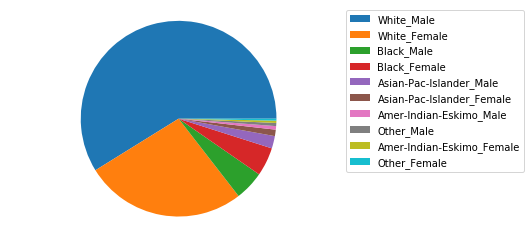

In [480]:
values = df.race_sex.value_counts()
labels = values.index.tolist()
print(values)
plt.pie(values, labels=None)
plt.legend(labels, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.axis('equal')
plt.show()

In [481]:

def plotBar(race_sex_value):
    all_data = df.loc[df['race_sex'] == race_sex_value, 'occupation']
    chart2_values = all_data.value_counts()
    labels = chart2_values.index.tolist()
    index = np.arange(len(labels))

    print("Given race_sex: {}".format(race_sex_value))
    print(chart2_values)
    plt.figure(figsize=(15,8))
    plt.bar(index, chart2_values.values)
    plt.xticks(index, labels, rotation=30)
    
    # This only shows the first legend item. Not sure why. Really weird. TODO
    #plt.legend(labels)

    plt.show()



In [482]:
# Plot only race_sex specificed
# plotBar("White_Male")

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


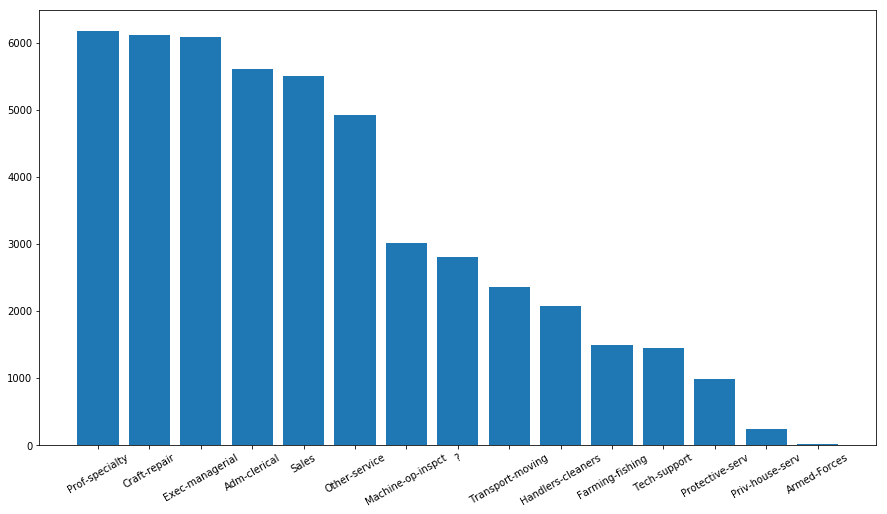

In [483]:
# Plot job distribution overall
all_data = df.occupation
chart2_values = all_data.value_counts()
labels = chart2_values.index.tolist()
index = np.arange(len(labels))


print(chart2_values)
plt.figure(figsize=(15,8))
plt.bar(index, chart2_values.values)
plt.xticks(index, labels, rotation=30)
plt.show()


Given race_sex: White_Male
Craft-repair         5258
Exec-managerial      3980
Prof-specialty       3513
Sales                3264
Transport-moving     1900
Machine-op-inspct    1877
Other-service        1729
Adm-clerical         1543
Handlers-cleaners    1538
?                    1314
Farming-fishing      1297
Tech-support          778
Protective-serv       717
Priv-house-serv        14
Armed-Forces           13
Name: occupation, dtype: int64


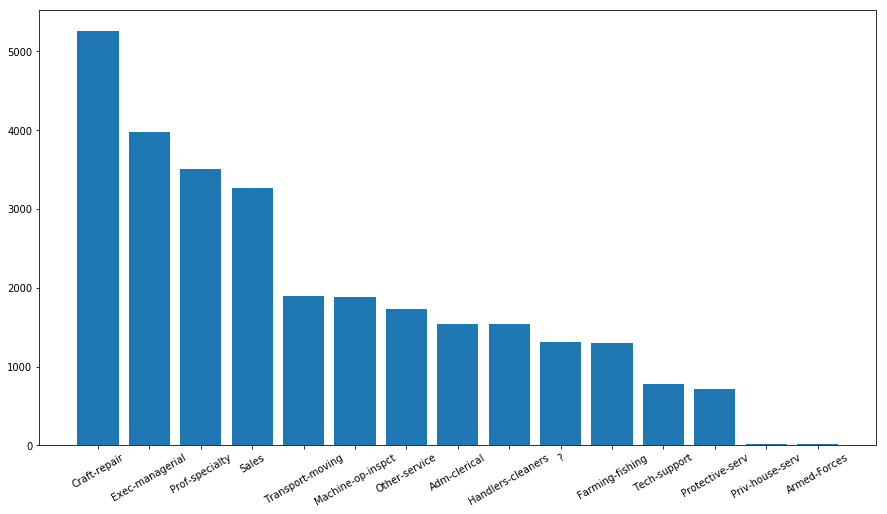

Given race_sex: Black_Male
Other-service        336
Craft-repair         313
Transport-moving     244
Machine-op-inspct    232
Handlers-cleaners    206
Adm-clerical         191
Exec-managerial      185
Prof-specialty       159
Sales                148
?                    146
Protective-serv      112
Tech-support          55
Farming-fishing       49
Armed-Forces           1
Name: occupation, dtype: int64


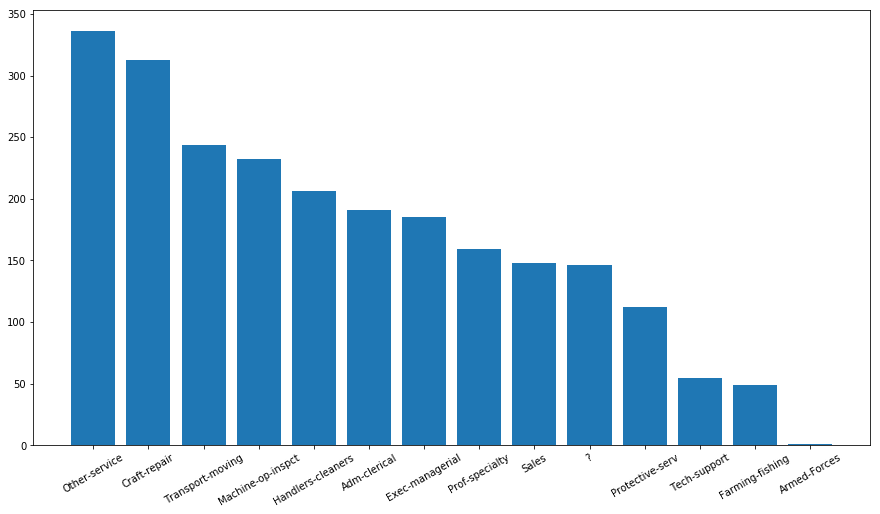

Given race_sex: Black_Female
Adm-clerical         547
Other-service        488
Prof-specialty       212
Sales                205
Machine-op-inspct    197
?                    183
Exec-managerial      166
Tech-support          77
Craft-repair          58
Handlers-cleaners     56
Priv-house-serv       51
Protective-serv       37
Transport-moving      24
Farming-fishing        7
Name: occupation, dtype: int64


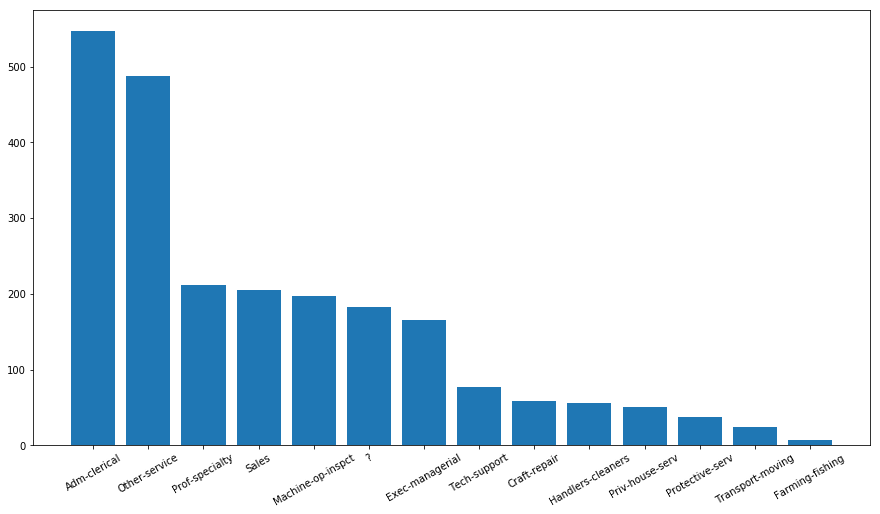

Given race_sex: White_Female
Adm-clerical         3035
Other-service        2074
Prof-specialty       1906
Sales                1646
Exec-managerial      1494
?                    1004
Machine-op-inspct     556
Tech-support          457
Craft-repair          246
Handlers-cleaners     181
Priv-house-serv       167
Transport-moving      100
Farming-fishing        86
Protective-serv        75
Name: occupation, dtype: int64


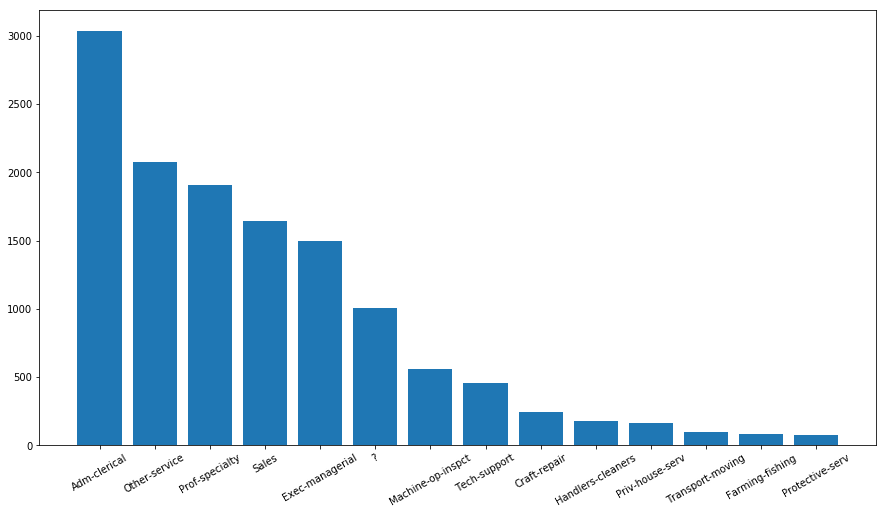

Given race_sex: Asian-Pac-Islander_Male
Prof-specialty       211
Exec-managerial      135
Craft-repair         109
Sales                107
Other-service        106
Adm-clerical          79
Machine-op-inspct     56
?                     49
Tech-support          44
Transport-moving      37
Handlers-cleaners     29
Farming-fishing       23
Protective-serv       17
Name: occupation, dtype: int64


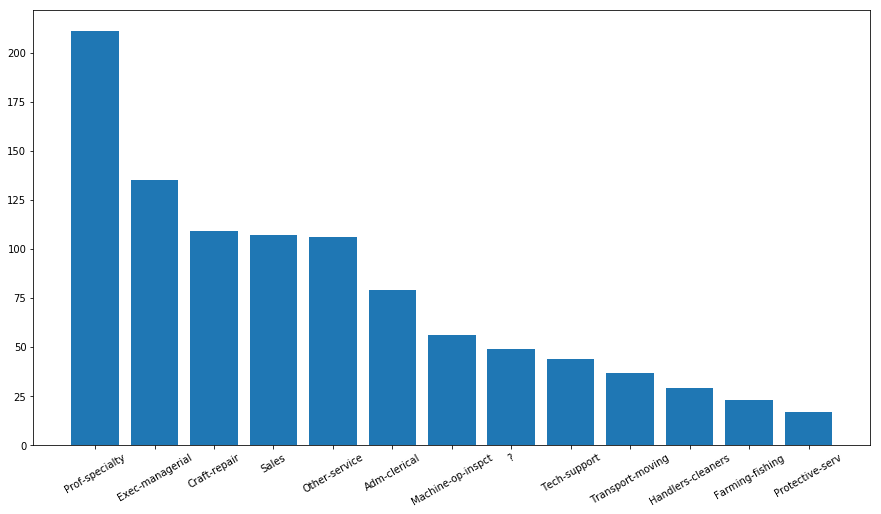

Given race_sex: Amer-Indian-Eskimo_Male
Craft-repair         57
Handlers-cleaners    29
Transport-moving     27
Other-service        27
Prof-specialty       26
Exec-managerial      25
Machine-op-inspct    22
Sales                18
?                    16
Adm-clerical         13
Farming-fishing      13
Protective-serv       8
Tech-support          3
Armed-Forces          1
Name: occupation, dtype: int64


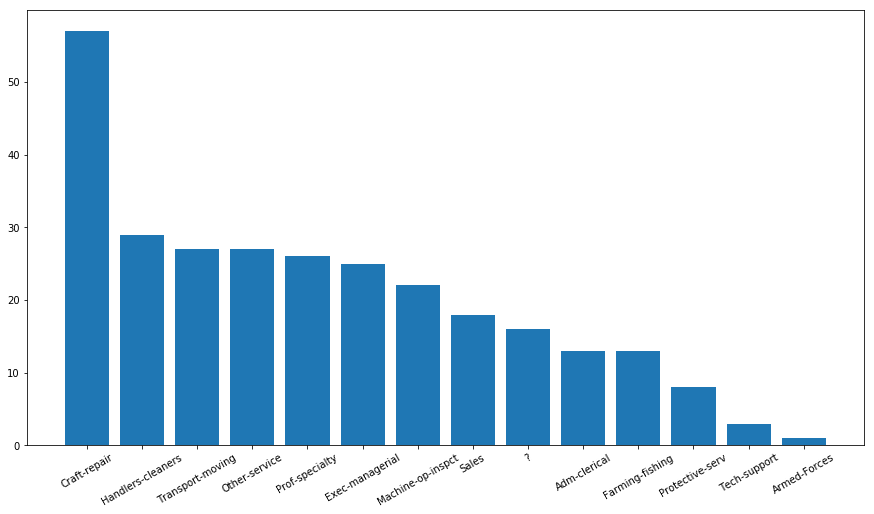

Given race_sex: Other_Female
Adm-clerical         27
Prof-specialty       24
Other-service        24
?                    20
Sales                18
Machine-op-inspct    16
Exec-managerial       7
Craft-repair          6
Tech-support          5
Priv-house-serv       4
Handlers-cleaners     2
Farming-fishing       1
Protective-serv       1
Name: occupation, dtype: int64


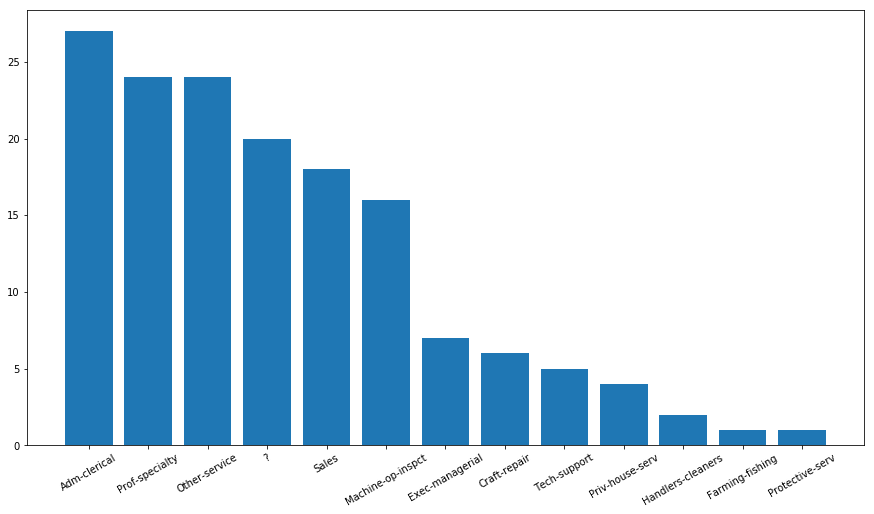

Given race_sex: Asian-Pac-Islander_Female
Adm-clerical         119
Other-service         78
Prof-specialty        78
Sales                 60
Exec-managerial       58
?                     47
Machine-op-inspct     29
Tech-support          18
Handlers-cleaners     10
Craft-repair           9
Priv-house-serv        5
Protective-serv        4
Transport-moving       2
Name: occupation, dtype: int64


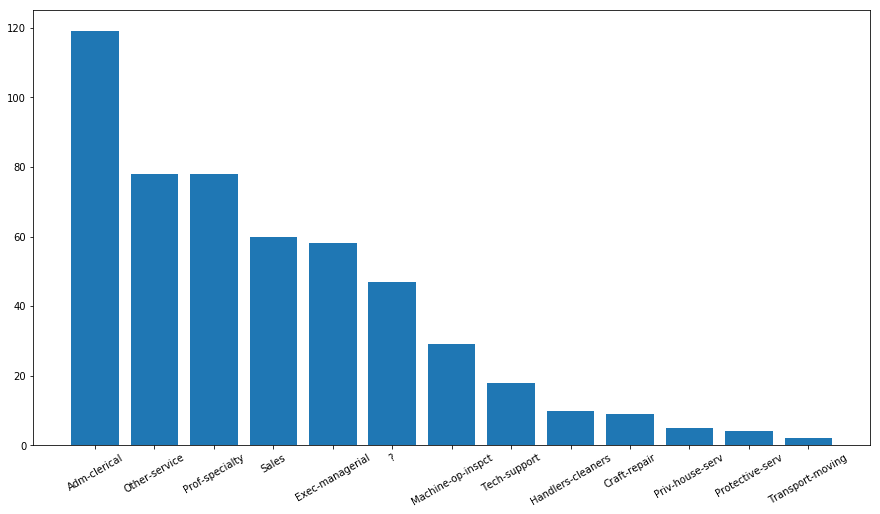

Given race_sex: Amer-Indian-Eskimo_Female
Adm-clerical         41
Other-service        34
Exec-managerial      23
Prof-specialty       22
?                    19
Sales                18
Machine-op-inspct     6
Handlers-cleaners     5
Protective-serv       5
Tech-support          5
Craft-repair          4
Farming-fishing       1
Transport-moving      1
Priv-house-serv       1
Name: occupation, dtype: int64


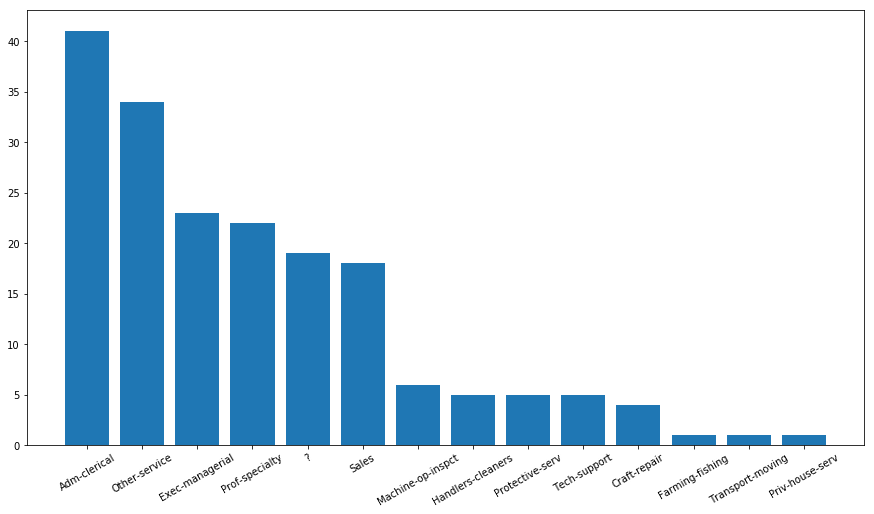

Given race_sex: Other_Male
Craft-repair         52
Machine-op-inspct    31
Other-service        27
Prof-specialty       21
Sales                20
Transport-moving     20
Handlers-cleaners    16
Adm-clerical         16
Farming-fishing      13
Exec-managerial      13
?                    11
Protective-serv       7
Tech-support          4
Name: occupation, dtype: int64


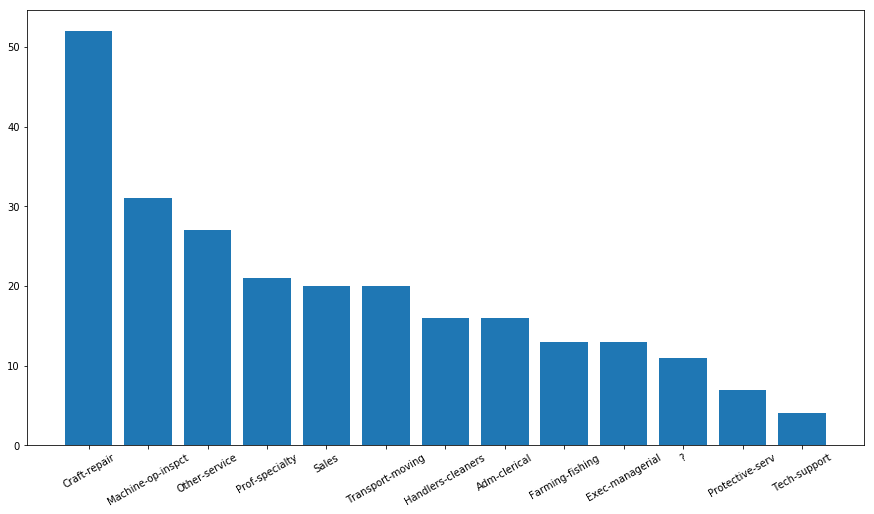

In [484]:
# Plot every race_sex value
for val in df.race_sex.unique():
    plotBar(val)
    

In [485]:
for sex in df.sex.unique():
    print(sex)
    relationships = df.loc[df['sex'] == sex, 'marital_status'].value_counts()
    print(relationships)
    print()


Male
Married-civ-spouse       19899
Never-married             8899
Divorced                  2632
Separated                  599
Married-spouse-absent      324
Widowed                    285
Married-AF-spouse           12
Name: marital_status, dtype: int64

Female
Never-married            7218
Divorced                 4001
Married-civ-spouse       2480
Widowed                  1233
Separated                 931
Married-spouse-absent     304
Married-AF-spouse          25
Name: marital_status, dtype: int64



In [486]:
# Model stuff below

In [487]:
# Train data
def my_tokenizer(s):
    # Do I want to deal with ,?, here? It could be interpreted to mean data is missing
    # Some missing data
    return s.split(",")

vect = CountVectorizer(stop_words=None, tokenizer=my_tokenizer)
# All the data
data = df['age'].apply(str) +','+ df['workclass'] + ',' + df['education_level'] + ',' + df['marital_status'] + ',' + df['relationship'] + ',' + df['sex'] + ',' + df['race'] + ',' + df['capital_gain'].apply(str) + ',' + df['capital_loss'].apply(str) + ',' + df['hours_week'].apply(str) + ',' + df['country'] + ',' + df['over_50k'].apply(str)
# Only train with most of the data so can predict on data not trained with later
training_index = len(data) - 150
training_dataset = data[:training_index]
train = vect.fit_transform(training_dataset)




In [488]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

df_data = list(df['over_50k'])
dd = df_data[:training_index]
X_train, X_test, y_train, y_test = train_test_split(train, dd, test_size = 0.4, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [489]:
print("Train accuracy is %.2f %%" % (model.score(X_train, y_train)*100))
print("Test accuracy is %.2f %%" % (model.score(X_test, y_test)*100))

Train accuracy is 94.49 %
Test accuracy is 94.31 %


In [490]:
prediction = data[training_index:]
assert len(dd) + len(prediction) == len(data)

def getPrediction(prediction, row = 0, num_round=3, printBoolean=True):
    index = training_index + row
    
    X_predict = vect.transform(prediction)
    predicted = model.predict(X_predict[row])
    predicted_prob = model.predict_proba(X_predict[row])
    target_labels = ['<50k', '>50k']

    prob_fail = round(predicted_prob[0][0]*100,num_round)
    prob_pass = round(predicted_prob[0][1]*100, num_round)
    
    if printBoolean:
        print('Looking at index: {} of all the data'.format(index))
        print(df.iloc[index])
        print(prediction.iloc[row])
        #display predictions
        for run, victory in zip(prediction.iloc[row], predicted):
            print('%r => %s' % (run, target_labels[int(round(victory))]))
            print("Probality: <50k: {}, >50k: {}".format(prob_fail, prob_pass))
    return prob_fail, prob_pass

In [491]:
getPrediction(prediction, row=11)

Looking at index: 48703 of all the data
id                              48704
age                                39
workclass                 Federal-gov
education_level               Masters
education_num                      14
marital_status     Married-civ-spouse
occupation              Other-service
relationship                  Husband
race                            Black
sex                              Male
capital_gain                     3137
capital_loss                        0
hours_week                         40
country               Trinadad&Tobago
over_50k                            0
profit                           3137
race_sex                   Black_Male
Name: 48703, dtype: object
39,Federal-gov,Masters,Married-civ-spouse,Husband,Male,Black,3137,0,40,Trinadad&Tobago,0
'3' => <50k
Probality: <50k: 79.656, >50k: 20.344


(79.656, 20.344)

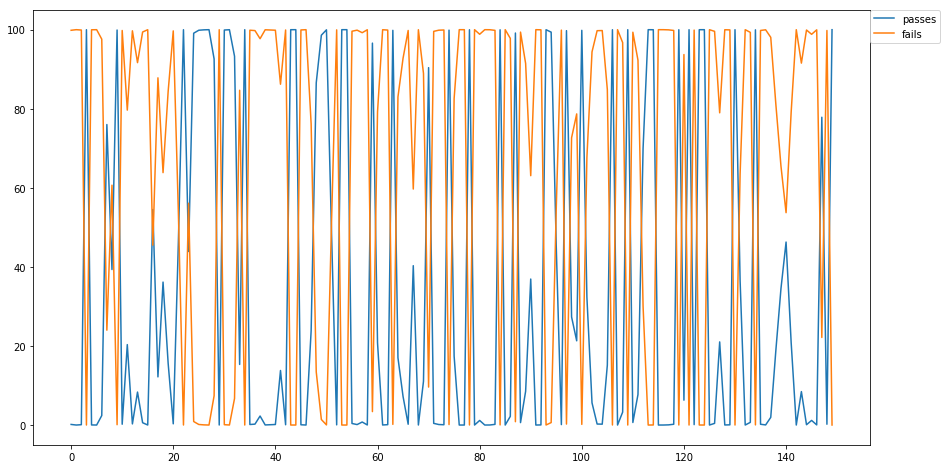

In [471]:
# Chart using model. Useful to pick an input to use
# Get all the data
fails = []
passes = []
for x in range(150):
    model_prediction = getPrediction(prediction, x, printBoolean=False)
    fails.append(model_prediction[0])
    passes.append(model_prediction[1])

plt.figure(figsize=(15,8))
lframe = pd.DataFrame()
lframe['passes'] = passes
lframe['fails'] = fails
labels = ['passes', 'fails']
lframe.columns = labels
plt.plot(lframe)
plt.legend(labels, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()